In [1]:
import gym


#定义环境
class MyWrapper(gym.Wrapper):

    def __init__(self):
        env = gym.make('Pendulum-v1', render_mode='rgb_array')
        super().__init__(env)
        self.env = env
        self.step_n = 0

    def reset(self):
        state, _ = self.env.reset()
        self.step_n = 0
        return state

    def step(self, action):
        state, reward, done, _, info = self.env.step(action)
        self.step_n += 1
        if self.step_n >= 200:
            done = True
        return state, reward, done, info


env = MyWrapper()

env.reset()

array([-0.9998288 , -0.01850212, -0.4979533 ], dtype=float32)

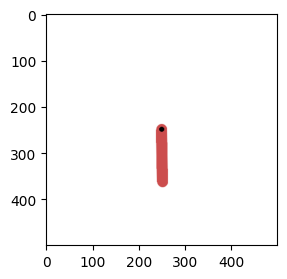

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline


#打印游戏
def show():
    plt.figure(figsize=(3, 3))
    plt.imshow(env.render())
    plt.show()


show()

In [3]:
#认识游戏环境
def test_env():
    print('env.observation_space=', env.observation_space)
    print('env.action_space=', env.action_space)

    state = env.reset()
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)

    print('state=', state)
    print('action=', action)
    print('next_state=', next_state)
    print('reward=', reward)
    print('done=', done)
    print('info=', info)


test_env()

env.observation_space= Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
env.action_space= Box(-2.0, 2.0, (1,), float32)
state= [ 0.9314149  -0.3639592   0.71713585]
action= [-1.0667996]
next_state= [ 0.9364916  -0.35068998  0.2841465 ]
reward= -0.19133394317625788
done= False
info= {}


In [4]:
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env

#初始化模型
model = A2C(
    policy='MlpPolicy',
    env=make_vec_env(MyWrapper, n_envs=8),  #使用N个环境同时训练
    learning_rate=1e-3,
    n_steps=5,  #运行N步后执行更新,batch_size=n_steps*环境数量
    gamma=0.9,
    verbose=0)

model

In [5]:
from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

/root/anaconda3/envs/pt39/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(-1247.169250970462, 287.27973636828875)

In [6]:
# #训练
# model.learn(200_0000, progress_bar=True)

# #保存模型
# model.save('save/3.A2C.Pendulum')

In [7]:
#加载模型
model = A2C.load('save/3.A2C.Pendulum')

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

(-319.25174775233245, 237.00185868279056)

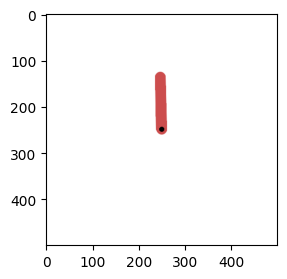

-552.9787354795611 200 [-6.403364529886047, -6.559451885950866, -6.748173157209415, -6.963253276383593, -7.197324400447656, -7.4421762566494225, -7.685702878753752, -8.011315249067252, -8.459531587420715, -9.098510053384656, -9.925879078787965, -10.149264029395011, -9.445930569893216, -8.689868121075914, -7.904861475428319, -7.117850854349222, -6.356961530227772, -5.648779500529242, -5.015805630954743, -4.474912934108402, -4.037135342960264, -3.708585894872944, -3.4920001320475516, -3.3883667575060783, -3.3982339678299924, -3.522440641779429, -3.762148023874511, -4.115998200501329, -4.639151657699833, -5.4589390140439065, -6.6816527282607066, -8.287440847676086, -10.209750584506137, -12.33837108003363, -11.785390804544472, -10.322449551850136, -8.805717924324806, -7.1012635254092915, -5.389966009745247, -4.266574138158974, -3.4008778125979338, -2.6928045577995054, -2.1295936927604435, -1.6917974921198649, -1.3581702708800174, -1.1087792548181659, -0.9265868823311403, -0.798001023015239

In [13]:
from IPython import display
import random


def test():
    state = env.reset()
    reward_sum = []
    over = False
    while not over:
        action, _ = model.predict(state)
        state, reward, over, _ = env.step(action)
        reward_sum.append(reward)

        if len(reward_sum) % 5 == 0:
            display.clear_output(wait=True)
            show()

    print(sum(reward_sum), len(reward_sum), reward_sum)


test()